# Projeto 1 - Predição da precificação de casas 
## House Sales in King County, USA - Kaggle

## Introdução

Este é um conjunto de dados armazenado no Kaggle, uma plataforma de estudo e competições de Ciência de Dados. Segue a tradução sobre o conjunto de dados.

**"Este conjunto de dados contém preços de venda de casas para King County, que inclui Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015."**

Segue a descrição das variaveis:

- id - identificação unica para cada venda
- date - data da venda
- price - preço da venda
- bedrooms - número de quartos
- bathrooms - número de banheiros
- sqft_living - tamanho da casa em metros quadrados
- sqft_lot - tamanho do lote em metros quadrados
- floors - número de andares
- waterfront - vista para praia
- view - visitado
- condition - condição da casa
- grade - nota de qualidade (baseado no sistema de classificação do King County)
- sqft_above - tamanho da área abaixo da casa em metros quadrados
- sqft_basement - tamanho do porão em metros quadrados
- yr_built - ano de construção
- yr_renovated - ano da ultima reforma
- zipcode - CEP
- lat - latitude
- long - longitude
- sqft_living15 - área da casa em 2015 (implica a algumas reformas). Isso pode ou não ter afetado a área do lote
- sqft_lot15 - área do lote em 2015 (implica a algumas reformas)

# Sobre este projeto

Este é o seu primeiro projeto usando Ciência de Dados. Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão linear e justificar

# Preparação do ambiente

- Acessem o link - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction e logo abaixo cliquem em "Download". Caso voce não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download.

# Exercicio 1. (0.5 pontos)

Formule ao menos duas perguntas que você acha que poderiam ser respondidas usando os dados

**RESPOSTA** (VALE 0.5 pontos):

1 - As casas vendidas pelos maiores valores foram as de maior área construída?

2 - Dentre as casas vendidas, as com vista para o mar estão entre os maiores valores?

3 - A pontuação de avaliação é proporcional aos preços?

In [68]:
# Importação das bibliotecas padrões
import pandas as pd
import numpy as np

In [69]:
# Implementação do dataframe
df = pd.read_csv('/content/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Exercicio 2. (2.5 pontos)

A capacidade de comunicação é um dos principais pontos na análise de dados, pois sua análise deve ser tão boa quanto a sua capacidade de comunicá-la. Para isso usamos tabelas resumo e gráficos para apresentar os principais achados do trabalho realizado. Podemos adicionar outros materias que possam aprofundar essa apresentação como artigos e outros estudos realizados.

Assim, qual visualização você acha interessante destacar?

**RESPOSTA** (VALE 0.75 pontos): A visualização gráfica é de extrema importância para a comunicação entre as partes envolvidas na análise de dados. É uma ótima opção para exemplificar tudo o que está sendo apresentado. Para este projeto, decidi implementar gráficos Scatterplot para poder visualizar os pontos individualizados, podendo assim ficar mais visível as correlações propostas.

In [70]:
# Importação das bibliotecas de visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

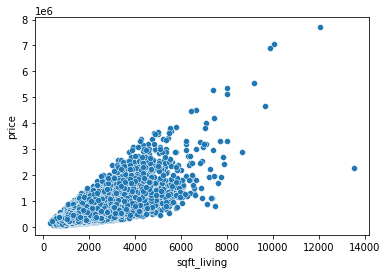

In [71]:
# Gráfico de comportamento entre preço e tamanho da casa
sns.scatterplot(data=df , x = 'sqft_living' , y = 'price')

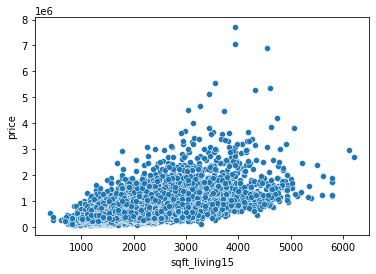

In [72]:
# Gráfico de comportamento entre preço e tamanho da casa em 2015, podendo ter mudanças devido a reformas.
sns.scatterplot(data=df , x = 'sqft_living15' , y = 'price')

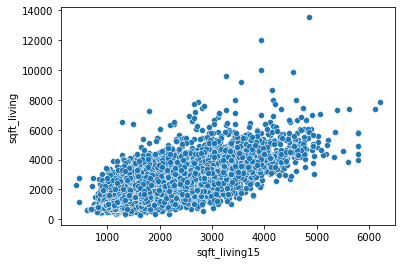

In [73]:
# Gráfico de comportamento entre as áreas originais das casas e as áreas em 2015
sns.scatterplot(data=df , x = 'sqft_living15' , y = 'sqft_living')

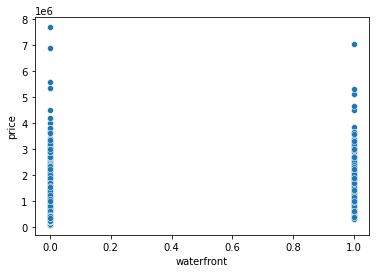

In [74]:
# Gráfico do comportamento do preço mediante a condição da casa ter (1) ou não ter (0) vista para o mar.
sns.scatterplot(data=df , x = 'waterfront' , y = 'price')

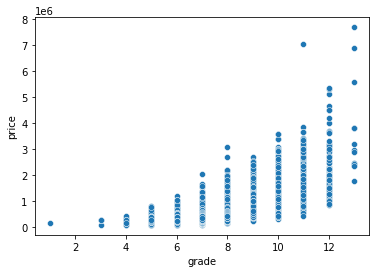

In [75]:
# Gráfico do comportamento entre o preço e a nota de avaliação do imóvel
sns.scatterplot(data=df , x = 'grade' , y = 'price')

# Exercicio 3. (3 pontos)

Faremos uma analise exploratoria sobre estes dados, preencha abaixo analises sobre o conjunto de dados. Para isso a biblioteca numpy para obter a contagem, média, mediana e os quartis.

In [76]:
#### (VALE 0.75 pontos)
# Função para contar o total de observação do dataframe
num = np.count_nonzero(df)
num

379086

In [77]:
# Contando quantas colunas tem o dataframe, de forma a sabermos o número total de variáveis
var = len(df.columns)
var

21

In [78]:
# Cálculo da média das áreas originais das casas
tamanho_medio = np.mean(df['sqft_living'])
tamanho_medio

2079.8997362698374

In [79]:
# Cálculo da média das áreas das casas em 2015
tamanho_medio15 = np.mean(df['sqft_living15'])
tamanho_medio15

1986.552491556008

In [80]:
# Cálculo da mediana do conjunto das áreas originais das casas
mediana_tamanho = np.median(df['sqft_living'])
mediana_tamanho

1910.0

In [81]:
# Cálculo da mediana do conjunto das áreas das casas em 2015
mediana_tamanho15 = np.median(df['sqft_living15'])
mediana_tamanho15

1840.0

In [82]:
# Cálculo do 1º quartil do conjunto das áreas originais das casas
quartil_1 = np.quantile(df['sqft_living'], 0.25)
quartil_1	

1427.0

In [83]:
# Cálculo do 1º quartil do conjunto das áreas das casas em 2015
quartil_1_15 = np.quantile(df['sqft_living15'], 0.25)
quartil_1_15

1490.0

In [84]:
# Cálculo do 3º quartil do conjunto das áreas originais das casas
quartil_3 = np.quantile(df['sqft_living'], 0.75)
quartil_3	

2550.0

In [85]:
# Cálculo do 3º quartil do conjunto das áreas das casas em 2015
quartil_3_15 = np.quantile(df['sqft_living15'], 0.75)
quartil_3_15	

2360.0

In [86]:
# VALE 0.75 pontos
# Substitua __ pelos valores solicitados
print('Existem {} observações no conjunto de dados'.format(num))
print('Existem {} variaveis no conjunto de dados\n'.format(var))
print('O tamanho médio das casas quando construídas é de {:.2f} metros quadrados'.format(tamanho_medio))
print('O tamanho médio das casas após algumas serem reformadas é de {:.2f} metros quadrados\n'.format(tamanho_medio15))
print('A mediana do tamanho das casas quando construídas é de {} metros quadrados'.format(mediana_tamanho))
print('A mediana do tamanho das casas após algumas serem reformadas é de {} metros quadrados\n'.format(mediana_tamanho))

# Quartis
print('Primeiro quartil {} do tamanho das casas quando construídas'.format(quartil_1))
print('Terceiro quartil {} do tamanho das casas quando construídas\n'.format(quartil_3))
print('Primeiro quartil {} do tamanho das casas após algumas serem reformadas'.format(quartil_1_15))
print('Terceiro quartil {} do tamanho das casas após algumas serem reformadas\n'.format(quartil_3_15))

Existem 379086 observações no conjunto de dados
Existem 21 variaveis no conjunto de dados

O tamanho médio das casas quando construídas é de 2079.90 metros quadrados
O tamanho médio das casas após algumas serem reformadas é de 1986.55 metros quadrados

A mediana do tamanho das casas quando construídas é de 1910.0 metros quadrados
A mediana do tamanho das casas após algumas serem reformadas é de 1910.0 metros quadrados

Primeiro quartil 1427.0 do tamanho das casas quando construídas
Terceiro quartil 2550.0 do tamanho das casas quando construídas

Primeiro quartil 1490.0 do tamanho das casas após algumas serem reformadas
Terceiro quartil 2360.0 do tamanho das casas após algumas serem reformadas



Neste conjunto de dados há casas com tamanho muito acima ou abaixo do esperado (outliers)? Faça um gráfico de caixa (boxplot) do tamanho das casas.

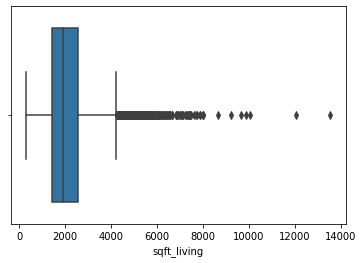

In [87]:
#### (VALE 0.75 pontos)
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

# Gráfico boxplot das áreas originais das casas
sns.boxplot(data=df , x = 'sqft_living')

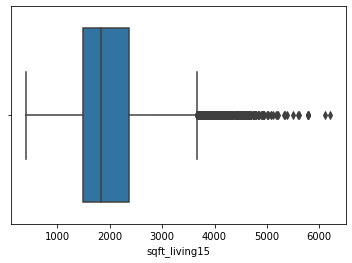

In [88]:
# Gráfico boxplot das áreas das casas em 2015
sns.boxplot(data=df , x = 'sqft_living15')

Observando a sua visualização, há casas com tamanhos muito abaixo ou acima do esperado (outliers)? 

**RESPOSTA** (VALE 0.75 pontos): Levando em consideração apenas os gráficos de boxplot das áreas dos imóveis, identifica-se que existem pontos que extrapolam o limite superior, podendo assim serem considerados como *outliers*.

# Exercicio 4. (4 pontos)

Construa um modelo de regressão linear para predizer a variável **price** (preço) com **statsmodels.api**.

In [89]:
import statsmodels.api as sm
from patsy import dmatrices

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [91]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

# Usamos a função patsy dmatrices para criar matrizes de design:

# Apesar de as variáveis 'id' e 'date' serem numéricas, são variáveis de classificação, o que ao meu entendimento não devem ser consideradas
# para os cálculos do modelo pois não influenciam na formação do preço de venda dos imóveis.

y, X = dmatrices('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15', data=df, return_type='dataframe')

In [92]:
# Criando o modelo
mod = sm.OLS(y, X)

In [93]:
# Usando o modelo para criar uma linha de melhor ajuste - Regressão Linear
res = mod.fit()

Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [94]:
#### (VALE 0.625 pontos)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Sat, 23 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:58:42   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.69e+06   2.93e+06      2.282

Faça outro modelo usando a biblioteca **sklearn**.

In [95]:
# Biblioteca para separação dos nossos dados em treino/teste e modelo de regressão
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [96]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

# Separamos o dado em X e y, onde X contem todas os atributos que explicam y, ou seja, todas os atributos que justificam a coluna Preço (price)
X = df.drop(['price', 'id', 'date'], axis=1)
y = df.price

In [97]:
# Precisaremos normalizar  X para que os dados sejam comparáveis e estejam em um mesmo padrão.
# Muitos modelos de aprendizado de máquina obtem um melhor desempenho quando o dado esta padronizado.

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [98]:
# Vamos separar o conjunto de dados em treino e teste, definindo o tamanho do conjunto de dados em 20%
# e para que tenhamos os mesmos resultados, usaremos a semente 10.

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 10)

In [99]:
# Construiremos o modelo de regressão usando o subconjunto de treino.

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [100]:
# Usaremos o nosso modelo para predizer a variavel y do conjunto de teste usando o conjunto X de teste.

y_pred = lr.predict(X_test)

Qual o valor de ${R}^{2}$ e $MAE$ obtido?

In [101]:
# Coeficiente de determinacao
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7097475175973715

In [102]:
# Erro medio absoluto
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

122934.82129205314

**RESPOSTA** (VALE 0.5 pontos): R1² = 0,710 e MAE1 = 122934,821

Faça novamente um novo modelo utilizando a seleção de caracteristicas, selecionando as 5 variaveis mais importantes.

In [103]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

# Executando o RFE com objetivo de obter as 5 variáveis mais importantes

# Importanto a função RFE: Eliminação de Características Recursiva
from sklearn.feature_selection import RFE

In [104]:
# Separando o conjunto de dados em X e y:
newX = df.drop(['price', 'id', 'date'], axis=1)
newy = df.price
newX_std = StandardScaler().fit_transform(newX)

In [105]:
# Estimador criado recebendo o modelo a ser aplicado
estimator = LinearRegression()

In [106]:
# Função RFE parametrizada com o modelo, o número de variáveis a ser encontradas e o número de recursos a serem removidos a cada interação
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(newX, newy)

In [107]:
# Recuperando as variáveis mais importantes selecionadas pela função RFE
selector.get_feature_names_out()

array(['waterfront', 'view', 'grade', 'lat', 'long'], dtype=object)

In [108]:
# Sabendo o ranking das variáveis mais importantes
selector.ranking_

array([ 4,  2,  8, 14,  6,  1,  1,  3,  1,  9, 10,  5, 12,  7,  1,  1, 11,
       13])

Quais são as 5 variaveis mais importantes deste conjunto de dados?

**RESPOSTA** (VALE 0.5 pontos): Segundo a função RFE parametrizada pelo modelo de Regressão Linear, obtemos que as 5 variáveis mais importantes são:\
1 - waterfront\
2 - view\
3 - grade\
4 - lat\
5 - long

In [109]:
# Determinando os novos X e Y
newX2 = df.drop(['price', 'sqft_living', 'bathrooms', 'sqft_living15', 'sqft_above', 'id', 'date', 'bedrooms', 'sqft_lot', 'floors', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_lot15'], axis=1)
newy2 = df.price

In [110]:
# Normazilando o novo X
newX2_std = StandardScaler().fit_transform(newX2)

In [111]:
# Vamos separar o conjunto de dados em treino e teste, definindo o tamanho do conjunto de dados em 20%
# e para que tenhamos os mesmos resultados, usaremos a semente 10.

newX2_train, newX2_test, newy2_train, newy2_test = train_test_split(newX2_std, newy, test_size = 0.2, random_state = 10)

In [112]:
# Construiremos o modelo de regressão usando o subconjunto de treino.

newlr = LinearRegression()
newlr.fit(newX2_train, newy2_train)

LinearRegression()

In [113]:
# Usaremos o nosso modelo para predizer a variavel y do conjunto de teste usando o conjunto X de teste.

newy2_pred = newlr.predict(newX2_test)

Qual o valor de ${R}^{2}$ e $MAE$ deste novo modelo? Este modelo é melhor do que o anterior?

In [114]:
# Coeficiente de determinacao

r2_score(newy2_test, newy2_pred)

0.5496128871163206

In [115]:
# Erro medio absoluto

mean_absolute_error(newy2_test, newy2_pred)

149639.7468423416

**RESPOSTA** (VALE 0.5 pontos): Utilizando a função RFE parametrizada com o modelo de Regressão Linear, obtivemos as variáveis mais importantes correlacionadas ao preço dos imóveis.\
Mediante estas variáveis, calculou-se novamente, utilizando as funções da biblioteca Sklearn os parâmetros de R² e MAE.\
Neste caso obtivemos os seguintes resultados:\
R2² - 0,550\
MAE2 - 149639,747

**RESPOSTA CONTINUAÇÃO:**\
Comparando-se os modelos aplicados obtivemos os seguintes resultados:

R1² = 0,710 / MAE1 = 122934,821\
R2² = 0,550 / MAE2 = 149639,747

Observa-se então, que o primeiro modelo aplicado, sem o ajuste das melhores variáveis, obteve resultados melhores que o segundo modelo. Uma possível explicação para isso, é que as variáveis escolhidas como sendo as melhores, podem ser dependentes de outras variáveis, e quando estas são removidas pela função RFE, pode causar um decréssimo na qualidade dos cálculos realizados pelo segundo modelo.